## GD Implementation for LR

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
from numpy import genfromtxt
data = genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [3]:
print(data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = data[:, 0]
y = data[:, 1]

#### Explore your data

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

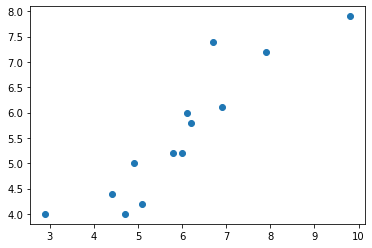

In [7]:
plt.scatter(X,y)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

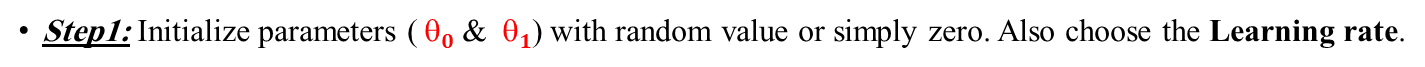

In [8]:
theta_0 = 0
theta_1 = 0
alpha = 0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.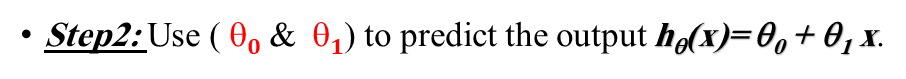
#### Note: you will need to iterate through all data points

In [9]:
h = theta_0 + theta_1 * X
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).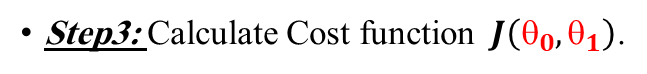
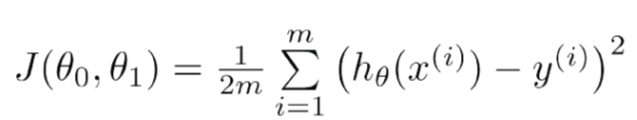

In [10]:
m = float(len(X))
j = (1/(2 * m)) * sum((h - y)**2)
j

16.305384479692318

### Step4: Calculate the gradient.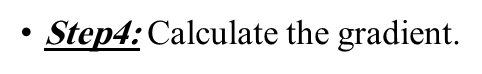
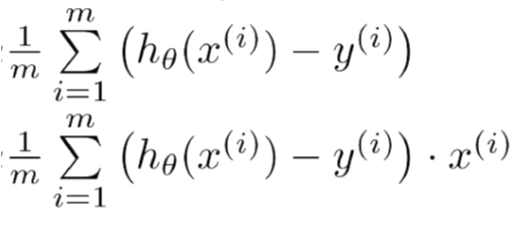

In [11]:
gradient_theta_0 = ((1 / m) * sum(h - y))
gradient_theta_1 = ((1 / m) * sum((h - y) * X))

### Step5: Update the parameters (simultaneously).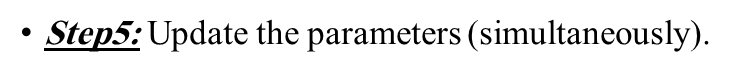
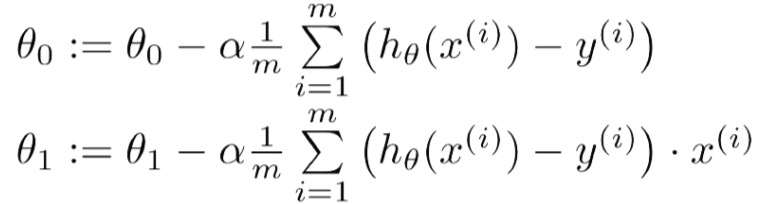

In [12]:
theta_0 = theta_0 - alpha * gradient_theta_0 
theta_1 = theta_1 - alpha * gradient_theta_1

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.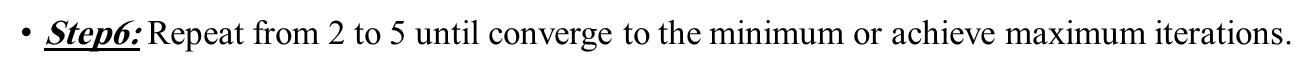

In [13]:
epochs = 100
loss = []
thetas_0 = []
thetas_1 = []
theta_0 = 0
theta_1 = 0
alpha = 0.001
for i in range(epochs):
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    h = theta_0 + theta_1 * X
    j = (1/(2 * m)) * sum((h - y)**2) 
    loss.append(j)
    gradient_theta_0 = (1 / m) * sum(h - y)
    gradient_theta_1 = (1 / m) * sum((h - y) * X)
    theta_0 = theta_0 - alpha * gradient_theta_0 
    theta_1 = theta_1 - alpha * gradient_theta_1      

In [14]:
print(loss[-1])
print(thetas_0[-1])
print(thetas_1[-1])

0.20718686081651794
0.14632156778420538
0.878079222595362


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [15]:
h = thetas_0[-1] + thetas_1[-1] * X
h

array([2.6927514 , 6.02945219, 4.44890984, 7.08314751, 8.75149812,
       6.20506829, 5.50260474, 5.59041258, 5.4147969 , 4.62452552,
       4.27329375, 4.00987023, 5.23918123])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

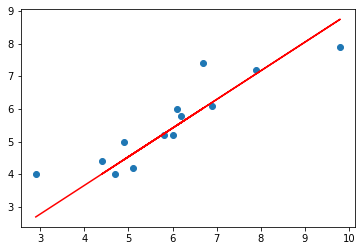

In [16]:
plt.scatter(X,y)
plt.plot(X, h, color='red')
plt.show()

#### Use R2 score to evaluate LR equation output
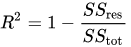
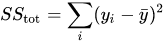
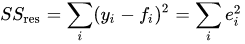
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y, h)

0.7401129798021142

### Plot loss vs. iterations

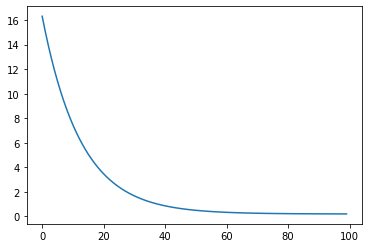

In [19]:
plt.plot(range(epochs), loss)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [20]:
from numpy import genfromtxt
data = genfromtxt('MultipleLR.csv', delimiter=',')

In [21]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [22]:
X = data[:, 0:3]
y = data[:, 3:4]

In [23]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [24]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Repeat your implementation but for more than one variable

In [25]:
# adding ones at 1st column for X0 for bias (theta_0)
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [26]:
epochs = 100
alpha = 0.00001
m = float(len(X))
loss = []
thetas = np.zeros((4,1))

for i in range(epochs):
    h = X @ thetas
    error = h - y
    j = (1/(2 * m)) * error.T@error
    loss.append(j)
    gradient_thetas = (1 / m) * X.T @ error
    thetas = thetas - alpha * gradient_thetas 
    
    if np.linalg.norm(gradient_thetas) < 0.0001:
        break

In [27]:
gradient_thetas

array([[ 0.01905935],
       [ 4.01025848],
       [ 4.52437796],
       [-8.31891296]])

In [28]:
thetas

array([[0.00825092],
       [0.66339208],
       [0.66651817],
       [0.69515767]])

In [29]:
loss

[array([[13405.98]]),
 array([[8668.48164892]]),
 array([[5605.88712389]]),
 array([[3626.04772762]]),
 array([[2346.16414415]]),
 array([[1518.77265879]]),
 array([[983.89835113]]),
 array([[638.12413967]]),
 array([[414.5952154]]),
 array([[270.09274619]]),
 array([[176.67756834]]),
 array([[116.28818345]]),
 array([[77.24858977]]),
 array([[52.0107415]]),
 array([[35.69514335]]),
 array([[25.14740615]]),
 array([[18.32834948]]),
 array([[13.91972865]]),
 array([[11.06935374]]),
 array([[9.22631966]]),
 array([[8.03448937]]),
 array([[7.2636352]]),
 array([[6.7649246]]),
 array([[6.44214358]]),
 array([[6.23309381]]),
 array([[6.09756668]]),
 array([[6.00956903]]),
 array([[5.95229734]]),
 array([[5.91488885]]),
 array([[5.89032126]]),
 array([[5.87405491]]),
 array([[5.86315514]]),
 array([[5.85572479]]),
 array([[5.85053742]]),
 array([[5.84680022]]),
 array([[5.84400063]]),
 array([[5.84180734]]),
 array([[5.84000615]]),
 array([[5.83845858]]),
 array([[5.83707514]]),
 array([[5.8

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [30]:
h = X @ thetas
h

array([[153.89415131],
       [185.00697629],
       [182.26748946],
       [198.52843789],
       [141.08710861],
       [104.06153865],
       [148.63178935],
       [110.22215622],
       [172.94248731],
       [160.24637185],
       [143.18508599],
       [141.21104491],
       [188.28228811],
       [156.48418843],
       [149.32382093],
       [187.75896747],
       [149.01241715],
       [178.3793077 ],
       [179.48998486],
       [160.60098154],
       [174.29115409],
       [173.58349206],
       [166.16224292],
       [155.10325135],
       [191.7200587 ]])

### Plot loss vs. iterations

In [31]:
loss = np.array(loss)
loss = loss.reshape((-1))
loss

array([1.34059800e+04, 8.66848165e+03, 5.60588712e+03, 3.62604773e+03,
       2.34616414e+03, 1.51877266e+03, 9.83898351e+02, 6.38124140e+02,
       4.14595215e+02, 2.70092746e+02, 1.76677568e+02, 1.16288183e+02,
       7.72485898e+01, 5.20107415e+01, 3.56951434e+01, 2.51474062e+01,
       1.83283495e+01, 1.39197286e+01, 1.10693537e+01, 9.22631966e+00,
       8.03448937e+00, 7.26363520e+00, 6.76492460e+00, 6.44214358e+00,
       6.23309381e+00, 6.09756668e+00, 6.00956903e+00, 5.95229734e+00,
       5.91488885e+00, 5.89032126e+00, 5.87405491e+00, 5.86315514e+00,
       5.85572479e+00, 5.85053742e+00, 5.84680022e+00, 5.84400063e+00,
       5.84180734e+00, 5.84000615e+00, 5.83845858e+00, 5.83707514e+00,
       5.83579795e+00, 5.83458960e+00, 5.83342592e+00, 5.83229126e+00,
       5.83117552e+00, 5.83007218e+00, 5.82897699e+00, 5.82788725e+00,
       5.82680117e+00, 5.82571762e+00, 5.82463586e+00, 5.82355541e+00,
       5.82247597e+00, 5.82139733e+00, 5.82031937e+00, 5.81924200e+00,
      

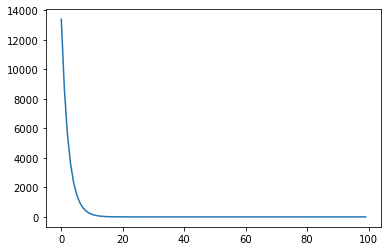

In [32]:
plt.plot(range(epochs), loss)
plt.show()

#### Use R2 score to evaluate LR equation output

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y, h)

0.9792027316970324

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [35]:
from sklearn.linear_model import LinearRegression

#### Train the model (fit the model to the training data)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
data = genfromtxt('RegData.csv', delimiter=',')
X = data[:, 0]
y = data[:, 1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
model = LinearRegression().fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))

#### Predict y values using the trained model

In [40]:
pred = model.predict(X_test.reshape(-1, 1))

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

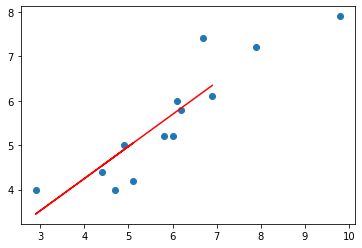

In [41]:
plt.scatter(X,y)
plt.plot(X_test, pred, color='red')
plt.show()

#### Use R2 score to evaluate model output

In [42]:
r2_score(y_test, pred)

0.5583248098238962

### Repeat for Mulivariate

In [43]:
from numpy import genfromtxt
data = genfromtxt('MultipleLR.csv', delimiter=',')

In [44]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [45]:
features = data[:, 0:3]
features

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [46]:
y = data[:, 3:4]
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)

In [48]:
model = LinearRegression().fit(X_train,y_train)

In [49]:
pred = model.predict(X_test)

In [50]:
r2_score(y_test, pred)

0.9558214867939169